### **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### `Initial Setup`

In [2]:
# Import library eksplorasi dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import library modeling


import warnings
warnings.filterwarnings('ignore')

### `Business Problem Understanding`

**<> Context**<br>
**`Bank Marketing Campaign`**
<br>
    Produk keuangan yang digunakan oleh masyarakat semakin beragam, salah satunya adalah deposito berjangka yang banyak dikenal. Deposit berjangka adalah ketika seseorang menyimpan uang di bank atau lembaga keuangan dan hanya bisa ditarik setelah beberapa waktu. Sebagai imbalannya, nasabah akan mendapatkan bunga tetap sesuai dengan jumlah uang yang disimpan.

Namun, bank harus bersaing agar tidak kehilangan nasabah. Salah satu cara yang digunakan adalah dengan melakukan kampanye pemasaran melalui panggilan telepon untuk menawarkan deposito berjangka. Jika nasabah setuju, mereka akan menandai variabel target dengan `yes` sama dengan `1`, jika tidak setuju, maka akan ditandai dengan `no` sama dengan `0`.

Keterangan target:

0 : Tidak menaruh deposit

1 : Menaruh deposit

**<> Problem Statement**
<br>
Bank ingin meningkatkan efisiensi kampanye penawaran deposito dengan cara menargetkan calon nasabah yang berpotensi tertarik, karena jika menawarkan deposito kepada semua nasabah tanpa penyaringan, maka akan menghabiskan waktu dan biaya yang lebih banyak.

**<> Stakeholder**<br>
   - Bank's Marketing Manager
   - Bank's Marketing Team 

**<> Goals**<br>
Berdasarkan masalah ini, bank berkeinginan mempunyai kemampuan untuk memproyeksikan kemungkinan calon nasabah yang akan menyimpan deposito, guna mengarahkan kampanye kepada calon nasabah yang berpotensi. Selain itu, bank juga ingin mengetahui faktor-faktor apa yang mempengaruhi calon nasabah yang memutuskan untuk menyimpan deposito dan yang tidak.

**<> Analytic Approach**<br>
Menganalisis data untuk mencari pola yang membedakan calon nasabah yang akan atau tidak akan menaruh deposito. Selanjutnya, akan dibuat model klasifikasi yang akan membantu bank dalam memprediksi kemungkinan seorang calon nasabah untuk menaruh deposito atau tidak.

**<> Metric Evaluation**<br><br>
**Type 1 error : False Positive**<br>
**Kondisi**: Nasabah terdeteksi berkeinginan membuka rekening deposito, padahal sebenarnya tidak tertarik untuk melakukannya.<br>
**Konsekuensi:** Campaign yang dilakukan bank akan cenderung sia-sia karena tidak tepat sasaran.

**Type 2 error : False Negative**<br>
**Kondisi**: Nasabah terdeteksi tidak berkeinginan membuka rekening deposito, padahal sebenarnya tertarik untuk melakukannya.<br>
**Konsekuensi:** Kehilangan calon nasabah yang berpotensial.

Berdasarkan konsekuensinya, tujuan utamanya adalah menciptakan model yang dapat mengurangi biaya kampanye bagi bank tanpa mengurangi jumlah calon nasabah potensial yang ingin dicari oleh bank. Kita ingin mendapatkan sebanyak mungkin prediksi yang benar untuk kelas positif, sambil meminimalkan prediksi yang salah positif. Oleh karena itu, metric utama yang akan kita gunakan adalah **`F1-Score`**.

### `Data Understanding`

Dataset dapat didownload pada ***[download](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW)*** . Untuk penjelasan kolom bisa dilihat di bawah ini :

In [2]:
data1 = pd.read_csv('data_bank_marketing_campaign.csv', engine='pyarrow')
print(f'Jumlah baris dan kolom: {data1.shape}')
display(data1.head(), data1.tail())

Jumlah baris dan kolom: (7813, 11)


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no
7812,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes


| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| age | umur nasabah |
| job | pekerjaan nasabah |
| balance | jumlah saldo tahunan |
| housing | memiliki cicilan rumah |
| loan | memiliki hutang |
| contact | jenis alat kontak |
| month | bulan terakhir saat nasabah dihubungi |
| campaign | jumlah kontak yang dilakukan selama kampanye kepada nasabah |
| pdays | jumlah hari setelah nasabah dihubungi dari kampanye sebelumnya |
| poutcome | hasil dari kampanye pemasaran sebelumnya |
| deposit | calon nasabah menaruh deposit berjangka |

Dataset ini berisi informasi tentang nasabah yang berpotensi untuk membuka rekening deposit dan nasabah yang tidak tertarik untuk melakukannya. Dimana, syarat utama untuk membuka deposito adalah memiliki `Kartu Identitas` dan usia minimal `18 tahun` (**age**), serta memiliki Rekening Simpanan atau Giro dengan saldo yang mencukupi (**balance**).   ***[(sumber)](https://www.nerdwallet.com/article/banking/how-to-open-a-bank-account-what-you-need)***

In [3]:
cols = ('age', 'balance')

for i in cols:
    if i in list(data1.columns) and i == 'age' and data1[i].unique().min() >= 18:
        print(f"Data {i} (umur) semua nasabah dalam dataset diatas 18 tahun")
    elif i in list(data1.columns) and i == 'balance':
        print(f"Data {i} tersedia, semua nasabah mempunyai Rekening")
    else:
        print("Data tidak tersedia")

Data age (umur) semua nasabah dalam dataset diatas 18 tahun
Data balance tersedia, semua nasabah mempunyai Rekening


Selain itu, pihak bank juga perlu memperhatikan interaksi dengan nasabah dalam menyampaikan informasi tentang produk deposito. Dengan pendekatan yang tepat, nasabah yang awalnya tidak berminat bisa menjadi tertarik dan akhirnya membuka rekening deposito. Oleh karena itu, penting untuk memeriksa bagaimana bank berkomunikasi dengan nasabah, frekuensi kampanye yang ditawarkan, dan waktu terakhir nasabah dihubungi oleh bank. Dengan demikian, bank dapat meningkatkan kesempatan untuk mengkonversi nasabah potensial menjadi nasabah deposito.

Setelah melihat dari data yang tersedia serta melakukan percobaan model, **model yang dihasilkan belum bisa maksimal** sehingga kami memutuskan untuk menambah kolom dari data yang sama dengan tujuan agar model lebih dapat mengenali nasabah yang akan melakukan deposit dan tidak ingin melakukan deposit. ***[sumber data](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset)***

In [4]:
data2 = pd.read_csv('bank (1).csv', engine='pyarrow')
print(f'Jumlah baris dan kolom: {data2.shape}')
display(data2.head(), data2.tail())

Jumlah baris dan kolom: (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
# menghapus data baru yang duplikat dengan kolom yang sudah ada 
data2 = data2.drop_duplicates(subset=list(data1.columns))

# menggabungkan data 
data = pd.merge(data1, data2, on=list(data1.columns), how='left')

# menata ulang kolom
data = pd.DataFrame(data, columns =['age', 'job', 'balance', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'poutcome', 'marital', 'education', 'default', 'day', 'duration', 'previous', 'deposit'])
data

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,married,secondary,no,4,94,0,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,married,tertiary,no,17,882,0,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,married,secondary,no,7,476,1,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,single,primary,no,13,531,0,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,married,secondary,no,18,176,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,married,secondary,no,3,322,0,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,married,tertiary,no,24,127,2,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,married,secondary,no,8,14,0,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,married,secondary,no,21,226,0,no


Kolom yang ditambahkan ke dalam dataset. <br>
| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| marital | Status perkawinan (categorical: 'divorced (cerai)','married (menikah)','single') |
| education | Tingkat pendidikan nasabah
| default | apakah memiliki kredit macet? (categorical: 'no','yes') |
| day | Hari kontak terakhir (numeric) |
| duration | Durasi kontak terakhir, dalam detik (seconds) (numeric) |
| previous | jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numeric) |

#### **Initial Assesment**

In [6]:
pd.DataFrame({
    'column': data.columns.values,
    'type': data.dtypes.values,
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,column,type,n_unique,min,max,sample_unique
0,age,int64,75,18,95,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,12,admin.,unknown,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,3153,-6847,66653,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,2,no,yes,"[no, yes]"
4,loan,object,2,no,yes,"[no, yes]"
5,contact,object,3,cellular,unknown,"[cellular, telephone, unknown]"
6,month,object,12,apr,sep,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,32,1,63,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,422,-1,854,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,4,failure,unknown,"[unknown, other, failure, success]"


__Insight :__
- Dataset terdiri dari 7813 baris dan 16 kolom.
- Nilai `unknown` pada kolom **job, contact, dan poutcome** akan dihandle.
- Kolom **month** akan di replace dan di encoding untuk analisis lebih mudah.
- Kolom **deposit** juga akan di encoding.
- Nilai `unknown` pada kolom **education** tetap dipertahankan karena tidak dapat didefinisikan.

#### **Numerical variable**

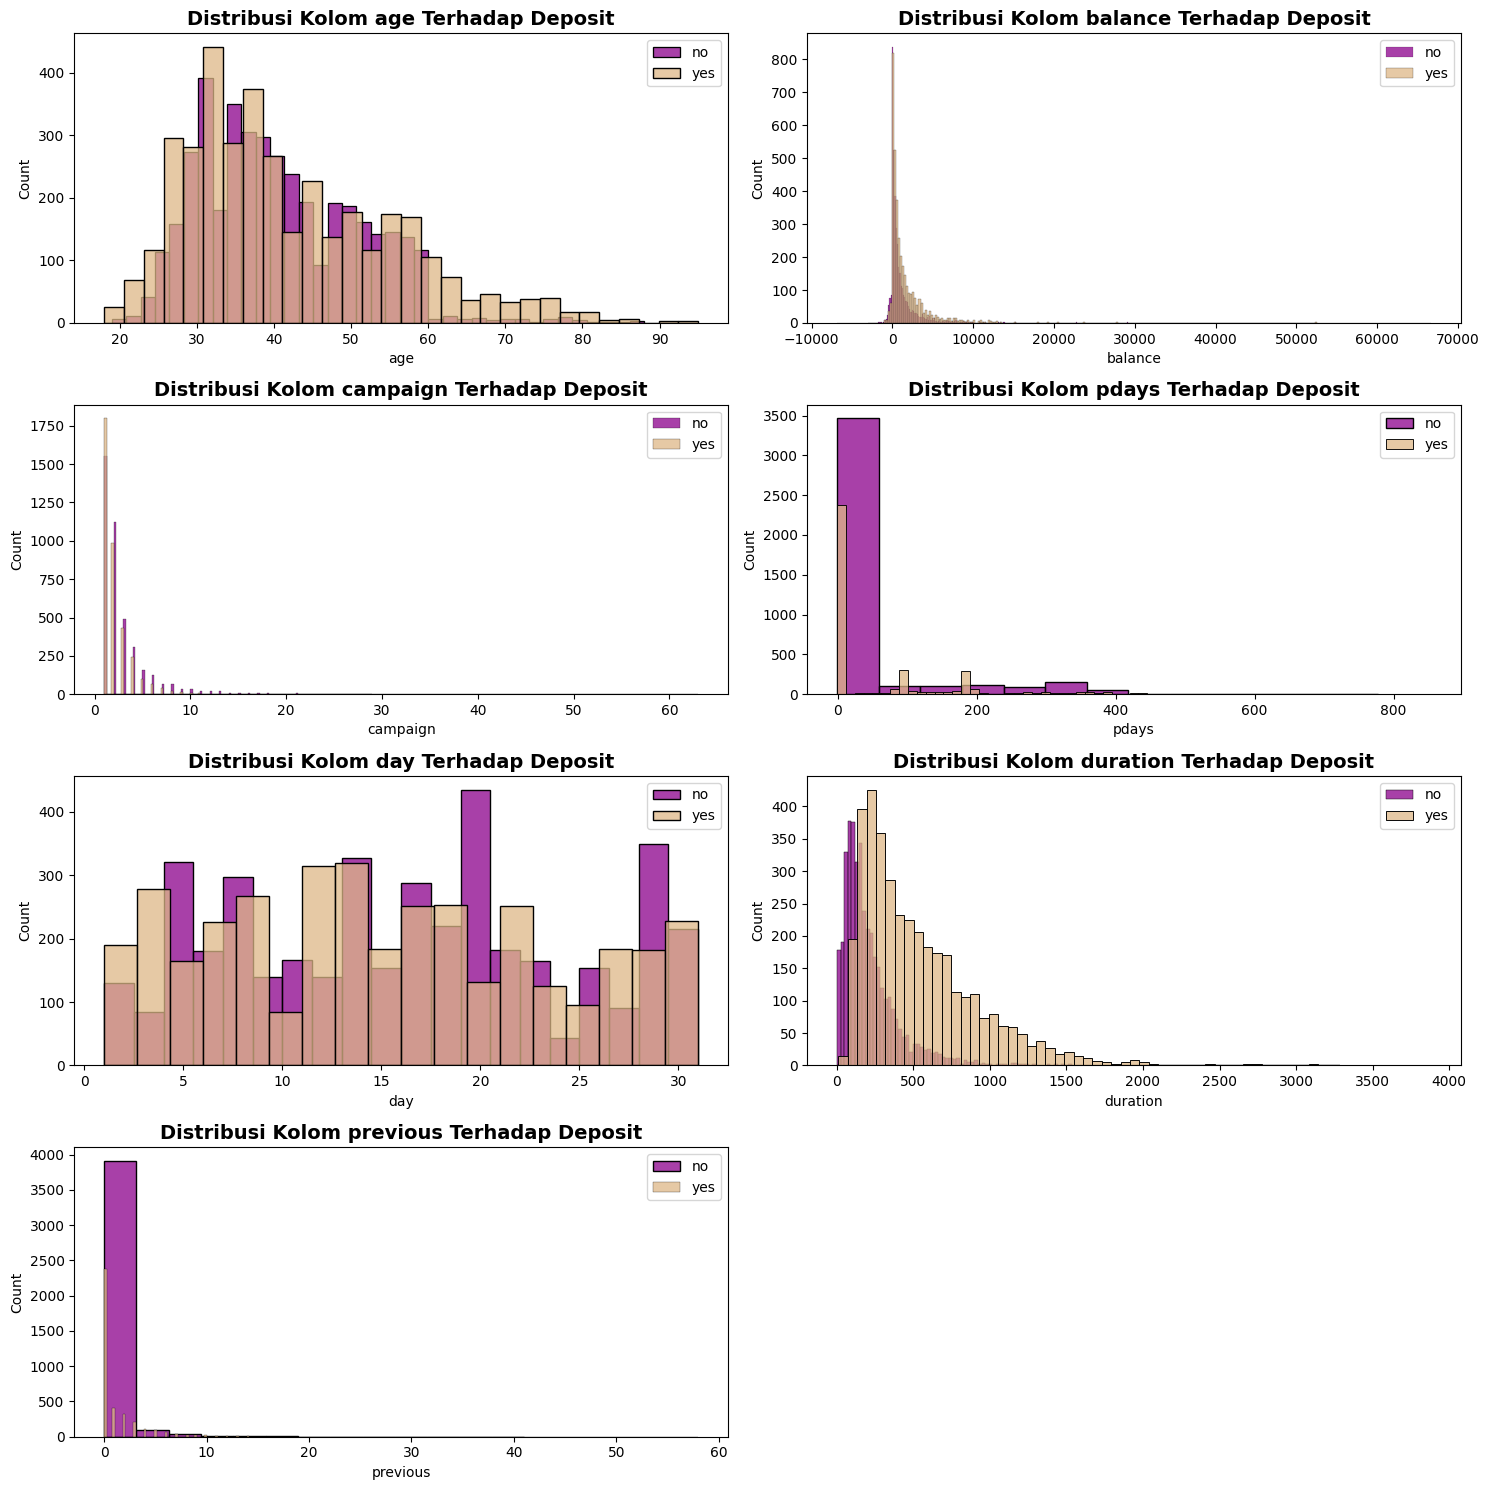

In [7]:
num_columns = ['age', 'balance', 'campaign', 'pdays', 'day', 'duration', 'previous']

plt.figure(figsize=(15, 15))
cmap = plt.get_cmap('summer')

a = 1
for i in num_columns:
    plt.subplot(4, 2, a)
    sns.histplot(x=data[data['deposit']=="no"][i], color="DarkMagenta")
    sns.histplot(x=data[data['deposit']=="yes"][i], color="BurlyWood")
    plt.legend(labels=['no', 'yes'])
    plt.tight_layout()
    plt.title(f'Distribusi Kolom {i} Terhadap Deposit', fontsize=14, weight='bold')
    a += 1


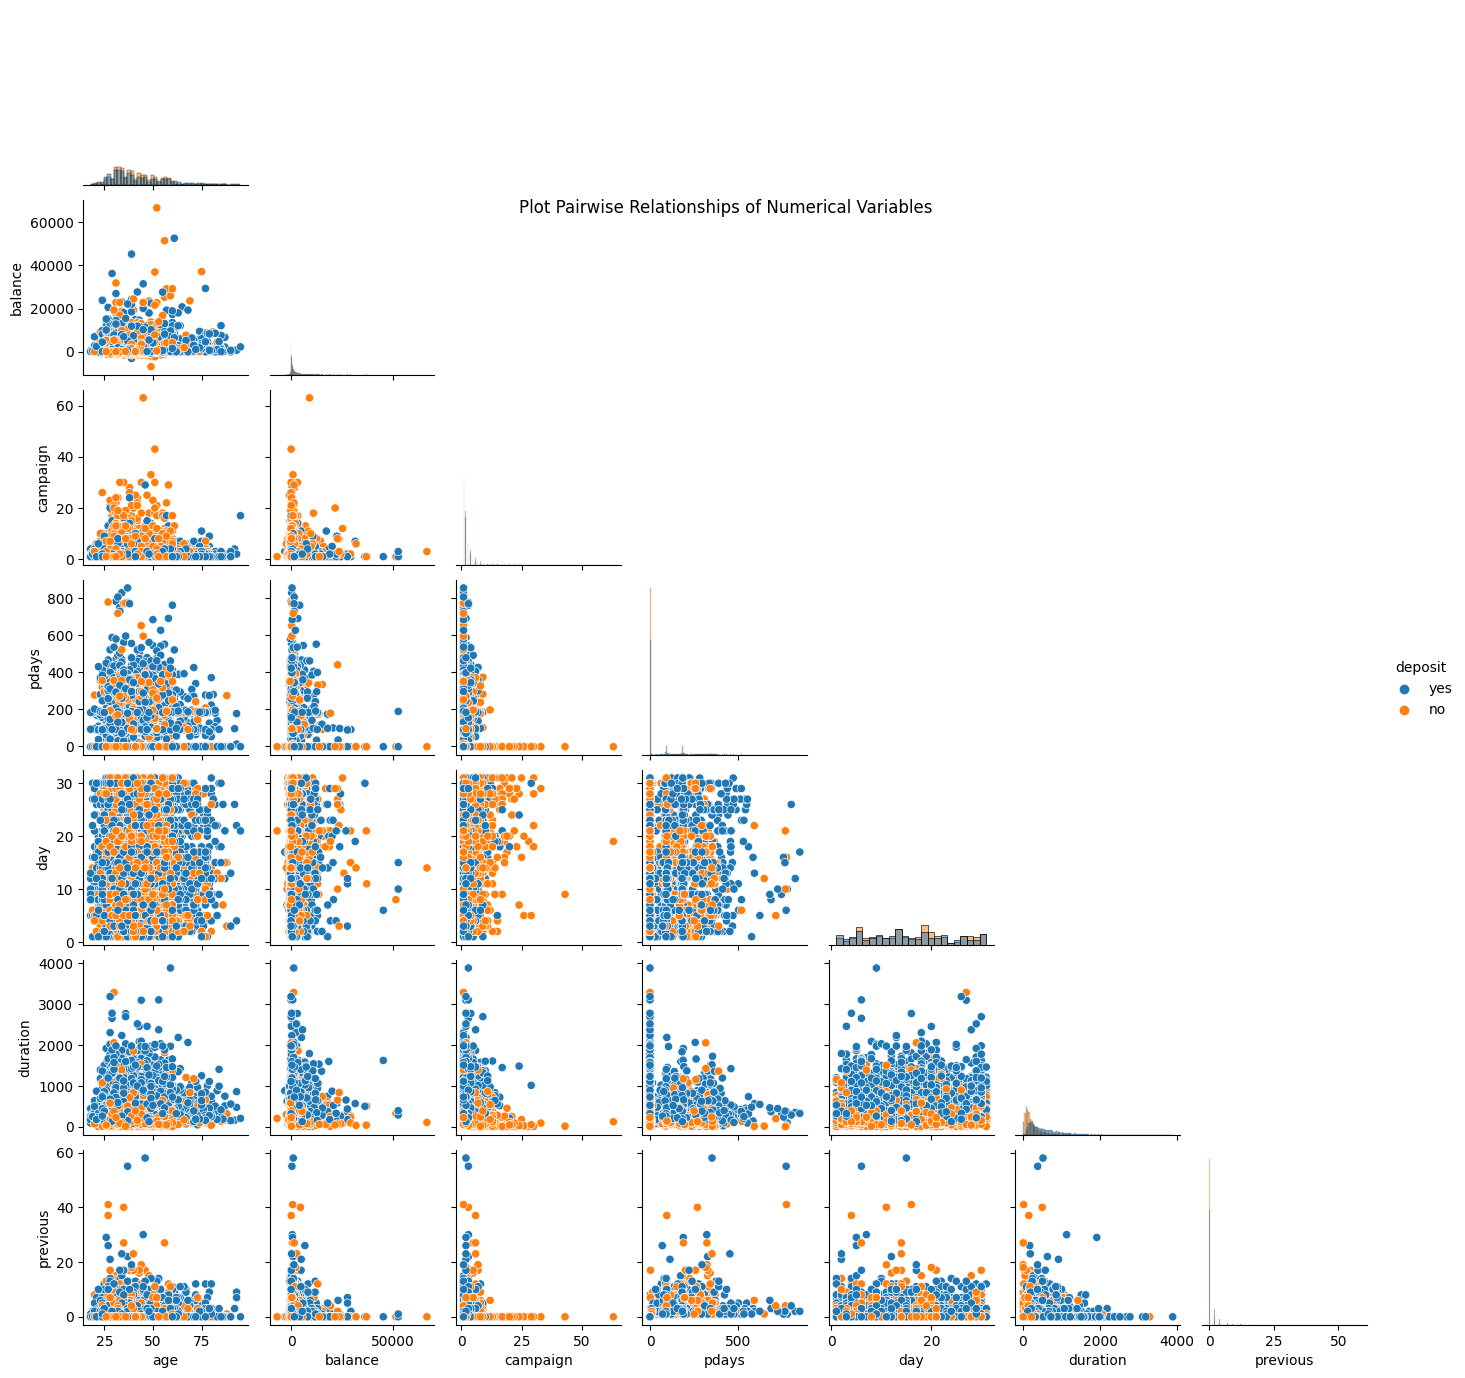

In [8]:
numerical = [var for var in data.columns if data[var].dtype != 'category']

graph = sns.pairplot(data[numerical], height=2.0, corner=True, diag_kind='hist', hue='deposit')
graph.fig.suptitle("Plot Pairwise Relationships of Numerical Variables", y=0.85)
plt.show()

__Insight :__
* Distribusi data mayoritas pada variabel tidak mengikuti distribusi Gaussian.
* Terdapat outlier multivariat terutama pada data dengan label target (deposit).
* Mayoritas data cenderung memiliki sebaran yang tinggi.
* Skala nilai pada variabel balance dan duration memiliki rentang yang luas.

#### **Categorical variable**

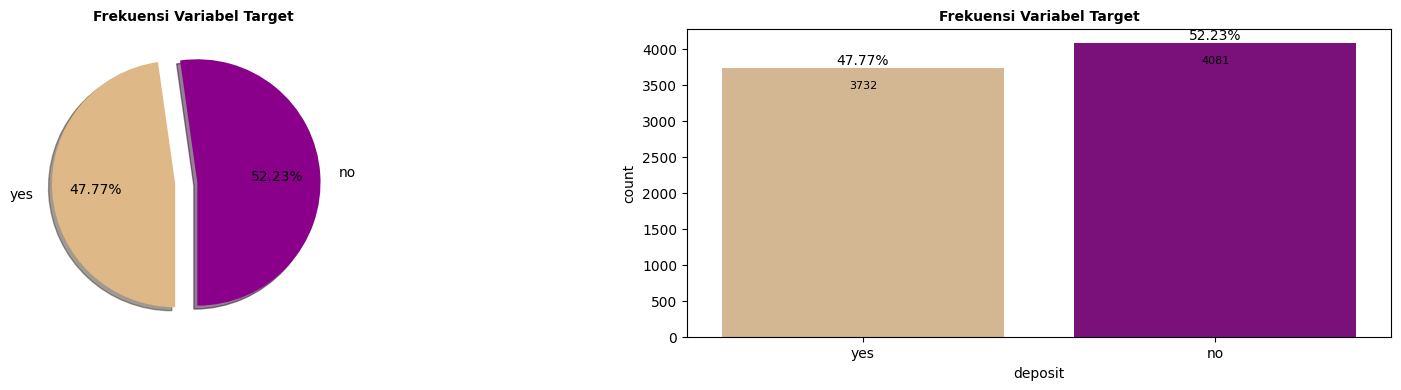

In [9]:
# Melihat kategori Target

# Mengatur proporsi grafik
fig, axes = plt.subplots(1, 2, figsize=(20, 4))
plt.style.use('default')

# create pie chart
temp_data = data.deposit.value_counts(normalize=True) * 100
axes[0].pie(x=[temp_data.loc['no'], temp_data.loc['yes']], labels=['no', 'yes'], colors=["DarkMagenta", "BurlyWood"], autopct='%0.2f%%',
            startangle=270, pctdistance=0.65, labeldistance=1.15, explode=(0.03, 0.15), shadow=True)
# set title
axes[0].set_title('Frekuensi Variabel Target', fontsize=10, weight='bold')

# create barplot
plt.title("Frekuensi Variabel Target", fontsize=10, weight='bold')
ax = sns.countplot(data=data, x="deposit", palette=["BurlyWood", "DarkMagenta"], ax=axes[1])
# ax.set_ylim([0, 3700])
# annotation
for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(data):.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                size=8,
                xytext=(0, -12),
                textcoords='offset points')

plt.show()

__Insight :__<br>
* Perbandingan data menunjukkan bahwa 52,2% nasabah tidak menaruh deposito, sedangkan 47,8% nasabah menaruh deposito.
* Jumlah nasabah yang tidak menaruh deposito sebanyak 4081, lebih banyak daripada nasabah yang menaruh deposito, yaitu 3732.
* Perbandingan ini termasuk dalam kategori target yang seimbang (balance), karena persentase nasabah yang membuka deposito dan yang tidak hampir sama.

Selanjutnya, kita melihat perbandingan frekuensi pada setiap kolom katergorikal berdasarkan status deposit.

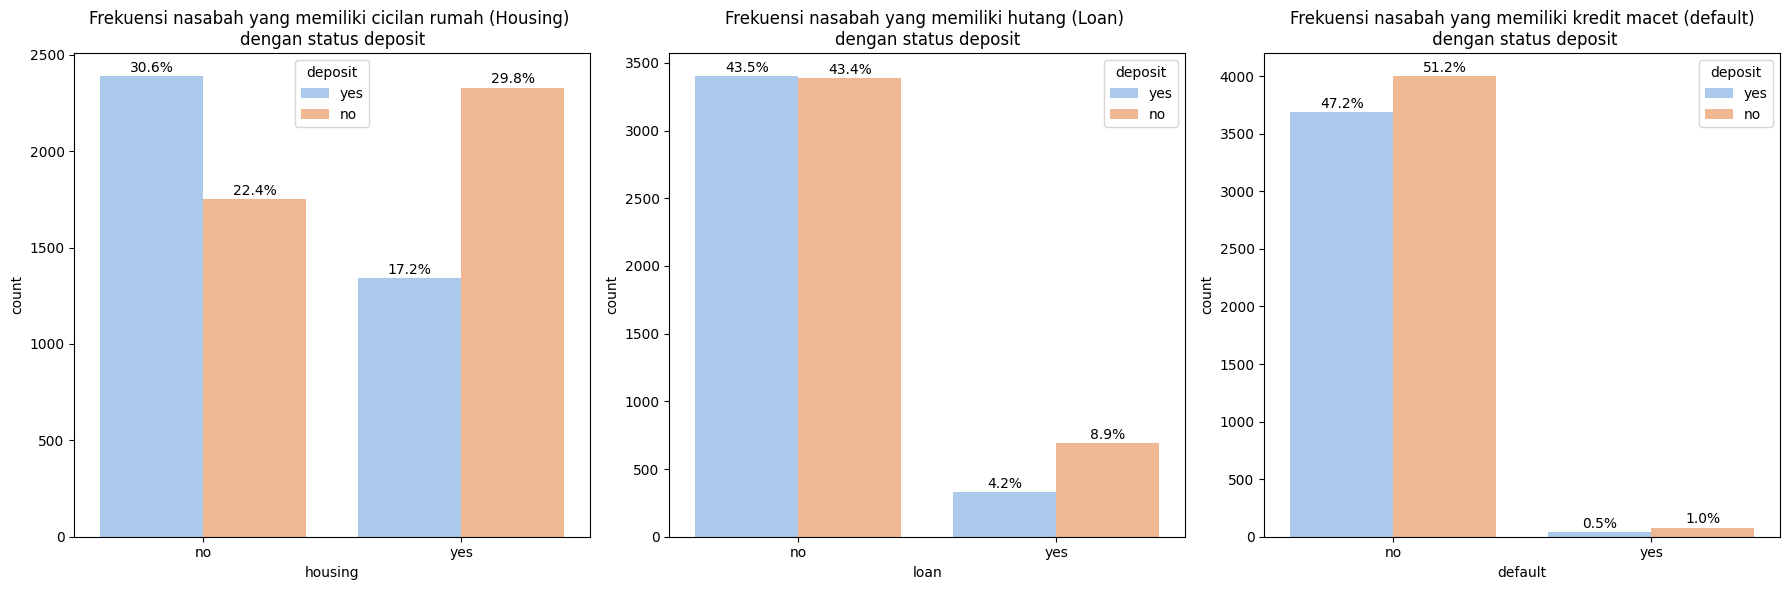

In [10]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1 - Frekuensi nasabah yang memiliki cicilan rumah (Housing) dengan status deposit
ax1 = axes[0]
ax1.set_title("Frekuensi nasabah yang memiliki cicilan rumah (Housing) \ndengan status deposit")
sns.countplot(data=data1, x="housing", hue='deposit', palette='pastel', ax=ax1)

for p in ax1.patches:
    percentage = f'{100 * p.get_height() / len(data1):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='center')

# Plot 2 - Frekuensi nasabah yang memiliki hutang (Loan) dengan status deposit
ax2 = axes[1]
ax2.set_title("Frekuensi nasabah yang memiliki hutang (Loan) \ndengan status deposit")
sns.countplot(data=data1, x="loan", hue='deposit', palette='pastel', ax=ax2)

for p in ax2.patches:
    percentage = f'{100 * p.get_height() / len(data1):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='center')

# Plot 3 - Frekuensi nasabah yang memiliki kredit macet (default) dengan status deposit
ax3 = axes[2]
ax3.set_title("Frekuensi nasabah yang memiliki kredit macet (default)\n dengan status deposit")
sns.countplot(data=data, x="default", hue='deposit', palette='pastel', ax=ax3)

for p in ax3.patches:
    percentage = f'{100 * p.get_height() / len(data):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax3.annotate(percentage, (x, y), ha='center', va='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


__Insight :__<br>
1. Bagi kategori kepemilikan rumah **(housing)**, nasabah yang memiliki KPR atau hutang rumah biasanya tidak membuka rekening deposito. Sementara itu, nasabah yang tidak memiliki KPR atau hutang rumah cenderung membuka rekening deposito.

2. Dalam kategori kepemilikan hutang perorangan **(loan)**, nasabah yang tidak memiliki hutang perorangan tetapi membuka rekening deposito jumlahnya hampir sama dengan nasabah yang tidak memiliki hutang perorangan dan tidak membuka rekening deposito. Namun, bagi nasabah yang memiliki hutang perorangan, kecenderungan mereka adalah tidak membuka rekening deposito.

3. Dalam kategori kredit macet **(default)**, nasabah yang memiliki kredit lancar tetapi membuka rekening deposito jumlahnya hampir sama dengan nasabah yang memiliki rekening lancar tapai tidak membuka rekening deposito. Namun, bagi nasabah yang memiliki kredit macet, kecenderungan mereka adalah tidak membuka rekening deposito.

4. Kepemilikan rumah, hutang perorangan, dan status kredit macet dapat dikatakan merupakan bagian dari faktor finansial yang memiliki pengaruh terhadap keputusan nasabah dalam membuka rekening deposito. Pola ini mengindikasikan bahwa nasabah cenderung mempertimbangkan komitmen finansial dan risiko saat memutuskan untuk berinvestasi dalam deposito. 

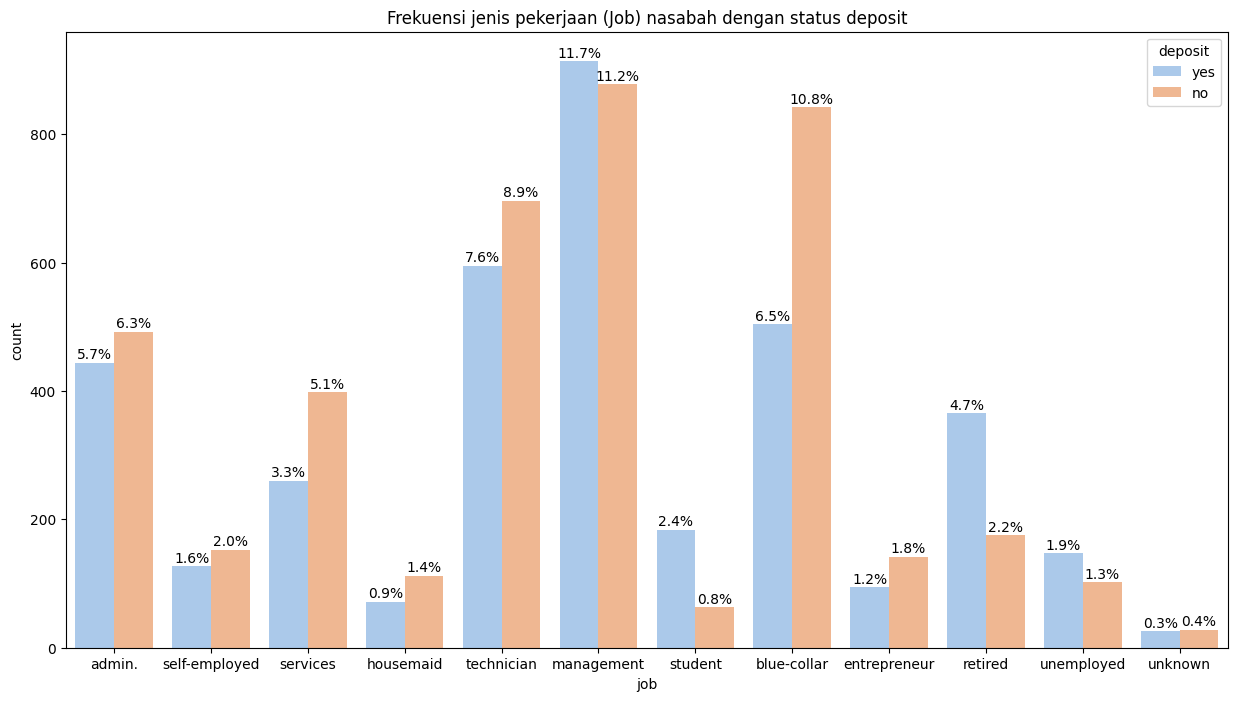

In [11]:
plt.subplots(figsize=(15, 8))
plt.title("Frekuensi jenis pekerjaan (Job) nasabah dengan status deposit")
ax = sns.countplot(data=data1, x="job", hue='deposit', palette='pastel')
# ax.set_ylim([0, 450])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / len(data1):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.show()

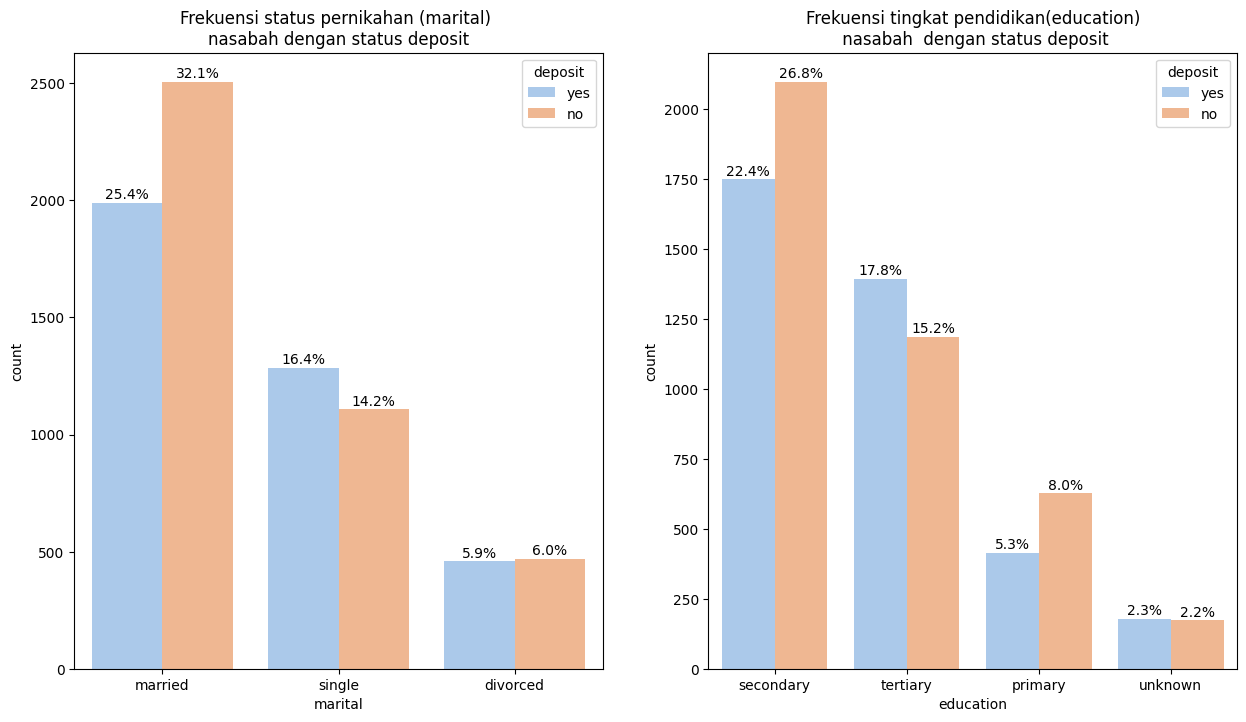

In [12]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Plot 1 - Frekuensi status pernikahan nasabah (marital) dengan status deposit
ax1 = axes[0]
ax1.set_title("Frekuensi status pernikahan (marital) \nnasabah dengan status deposit")
sns.countplot(data=data, x="marital", hue='deposit', palette='pastel', ax=ax1)

for p in ax1.patches:
    percentage = f'{100 * p.get_height() / len(data):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(percentage, (x, y), ha='center', va='center')

# Plot 2 - Frekuensi tingkat pendidikan nasabah (education) dengan status deposit
ax2 = axes[1]
ax2.set_title("Frekuensi tingkat pendidikan(education)\n nasabah  dengan status deposit")
sns.countplot(data=data, x="education", hue='deposit', palette='pastel', ax=ax2)

for p in ax2.patches:
    percentage = f'{100 * p.get_height() / len(data):.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax2.annotate(percentage, (x, y), ha='center', va='center')



__Insight :__<br>
1. Setiap kategori pekerjaan **(job)** memiliki pengaruh yang berbeda terhadap keputusan orang untuk membuka rekening deposito. Pengaruhnya bervariasi tergantung pada jenis pekerjaannya.
2. Kolom **marital** dan **education** memberikan informasi deskriptif tentang kategori nasabah. 
3. Nasabah dengan status `"married"` memiliki jumlah yang lebih besar dalam melakukan deposito.
4. Nasabah dengan tingkat pendidikan `"secondary"` memiliki jumlah yang lebih besar dalam melakukan deposito.


### `Data Preparation`

In [13]:
df = data.copy()
df.sample(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,deposit
5954,30,technician,289,yes,no,cellular,aug,4,-1,unknown,married,secondary,no,14,1184,0,yes
479,41,admin.,14968,no,no,cellular,jul,4,-1,unknown,married,secondary,no,23,1360,0,yes
3175,45,blue-collar,61,no,no,cellular,apr,1,-1,unknown,married,primary,no,17,108,0,no
5089,38,self-employed,30,no,no,unknown,jun,1,-1,unknown,married,secondary,no,16,91,0,no
7084,41,blue-collar,1384,yes,no,unknown,may,4,-1,unknown,married,secondary,no,15,1162,0,yes


In [14]:
display(
    # numerical variable
    df.describe(),
    # categorical variable
    df.describe(include='object')
)

,age,balance,campaign,pdays,day,duration,previous
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550,15.603993,372.410214,0.850890
std,11.919710,3089.291831,2.727001,108.072739,8.399924,348.303857,2.405492
min,18.000000,-6847.000000,1.000000,-1.000000,1.000000,2.000000,0.000000
25%,32.000000,127.000000,1.000000,-1.000000,8.000000,139.000000,0.000000
50%,39.000000,549.000000,2.000000,-1.000000,15.000000,255.000000,0.000000
75%,49.000000,1684.000000,3.000000,40.000000,21.000000,498.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,31.000000,3881.000000,58.000000


,job,housing,loan,contact,month,poutcome,marital,education,default,deposit
count,7813,7813,7813,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,3,4,2,2
top,management,no,no,cellular,may,unknown,married,secondary,no,no
freq,1792,4140,6789,5628,1976,5819,4493,3844,7692,4081


#### **Data Wrangling**

In [15]:
# Membuat peta penggantian nilai 'no' dan ' yes
target_mapping = {
    'no': 0,
    'yes': 1
}

# Menggantikan nilai dalam kolom 'deposit' dengan menggunakan metode replace
df['deposit'] = df['deposit'].replace(target_mapping)

**Missing Value**, Deteksi dan kuantifikasi missing value:

(age          0
 job          0
 balance      0
 housing      0
 loan         0
 contact      0
 month        0
 campaign     0
 pdays        0
 poutcome     0
 marital      0
 education    0
 default      0
 day          0
 duration     0
 previous     0
 deposit      0
 dtype: int64,
 <Axes: >)

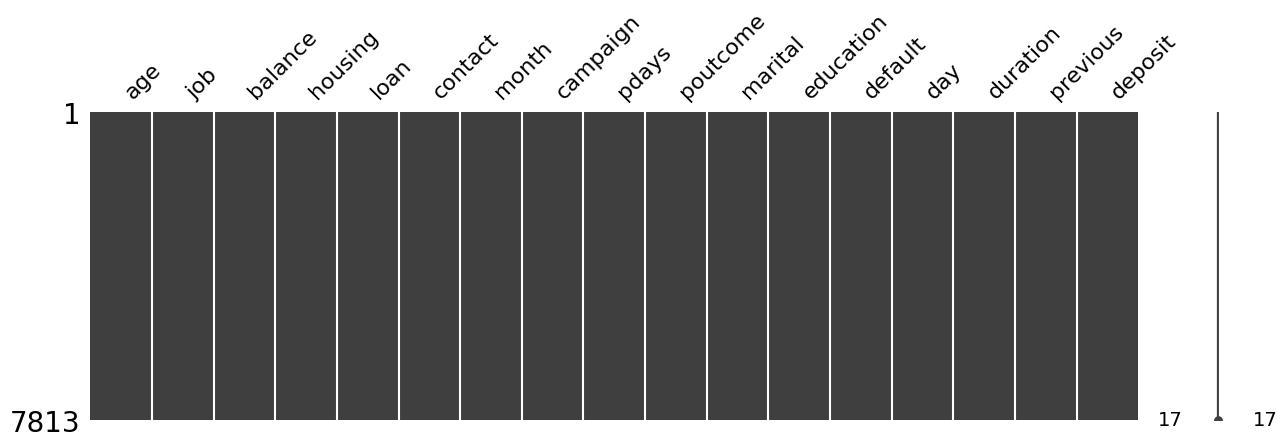

In [16]:
# Cek Missing Value seluruh kolom
df.isna().sum(), msno.matrix(data, figsize=(15, 4))

__Insight :__ 
* Tidak terdapat missing value pada setiap kolom dataset.

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data:

In [17]:
# Cek Data Duplikat

Duplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum()/df.shape[0])*100,2)
print(f'Jumlah Data Duplikat: {Duplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah Data Duplikat: 8
Persentase Data Duplikat: 0.1%
Jumlah baris dan kolom: (7813, 17)


__Insight :__ 
* Sebesar 0.10% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplicate data

In [18]:
# Drop duplikat
df.drop_duplicates(keep='last', inplace=True, ignore_index=True)

# Tampilkan jumlah data duplikat dan persentase data duplikat
Duplicated = df.duplicated().sum()
DuplicatedPerc = round((df.duplicated().sum() / df.shape[0]) * 100, 2)
print(f'Jumlah Data Duplikat: {Duplicated}\nPersentase Data Duplikat: {DuplicatedPerc}%')

# Tampilkan jumlah baris dan kolom setelah drop duplikat
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah Data Duplikat: 0
Persentase Data Duplikat: 0.0%
Jumlah baris dan kolom: (7805, 17)


**Data Typo**, Deteksi dan kuantifikasi text typo

In [20]:
cat_columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome', 'marital', 'education', 'default']
# Cek data typo untuk categorical variable

for i in cat_columns:
    uniqueValue = df[i].unique()
    print(f"Feature {i}: {uniqueValue}")

Feature job: ['admin.' 'self-employed' 'services' 'housemaid' 'technician' 'management'
 'student' 'blue-collar' 'entrepreneur' 'retired' 'unemployed' 'unknown']
Feature housing: ['no' 'yes']
Feature loan: ['no' 'yes']
Feature contact: ['cellular' 'telephone' 'unknown']
Feature month: ['jun' 'apr' 'may' 'nov' 'jan' 'sep' 'feb' 'mar' 'aug' 'jul' 'oct' 'dec']
Feature poutcome: ['unknown' 'other' 'failure' 'success']
Feature marital: ['married' 'single' 'divorced']
Feature education: ['secondary' 'tertiary' 'primary' 'unknown']
Feature default: ['no' 'yes']


__Insight :__
* pada kolom `job` terdapat jenis kategori yang typo yaitu **admin.** dan akan dihandling menggunakan pycaret

Handling data typo:

In [21]:
rename_admin = {
    'admin.': 'admin'
}

# Menggantikan nilai dalam kolom 'job' dengan menggunakan metode replace
df['job'] = df['job'].replace(rename_admin)

**Outlier**<br><br>
Deteksi dan kuantifikasi outlier:

In [22]:
from pycaret.anomaly import *

anomaly = setup(session_id=0,
                data=df,
                outliers_threshold=0.05,
                normalize=True,
                normalize_method='zscore')

outlierIF = create_model('iforest', verbose=False)      #merupakan detector
df = assign_model(outlierIF)
plot_model(outlierIF, 'umap', scale=0.7)

total_outliers = len(df[df['Anomaly'] == 1])
total_data = len(df)
percent_outliers = (total_outliers / total_data) * 100

print(f"Jumlah total outliers ada: {total_outliers}")
print(f"Persentase outliers: {percent_outliers:.2f}%")

# Tampilkan jumlah nilai Anomaly
print(df.Anomaly.value_counts())


,Description,Value
0,Session id,0
1,Original data shape,"(7805, 17)"
2,Transformed data shape,"(7805, 49)"
3,Ordinal features,3
4,Numeric features,8
5,Categorical features,9
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


Jumlah total outliers ada: 391
Persentase outliers: 5.01%
0    7414
1     391
Name: Anomaly, dtype: int64


__Insight :__<br>
* Jumlah total outliers ada **391**. Hal ini menunjukkan adanya data yang diidentifikasi sebagai anomali atau outlier dalam dataset.
* Persentase outliers adalah **5.01%** yang aertinya dari keseluruhan data dalam dataset dianggap sebagai outliers atau data yang jarang dan akan dihandling menggunakna pycaret.
* Dari data tersebut, sebanyak **7414** data (nilai 0) dianggap sebagai data normal atau mayoritas, sedangkan **`391`** data (nilai 1) dianggap sebagai outliers.

**Rare label**, <br>
Deteksi dan kuantifikasi rare value dan data problematik yang memiliki nilai `unknown` :

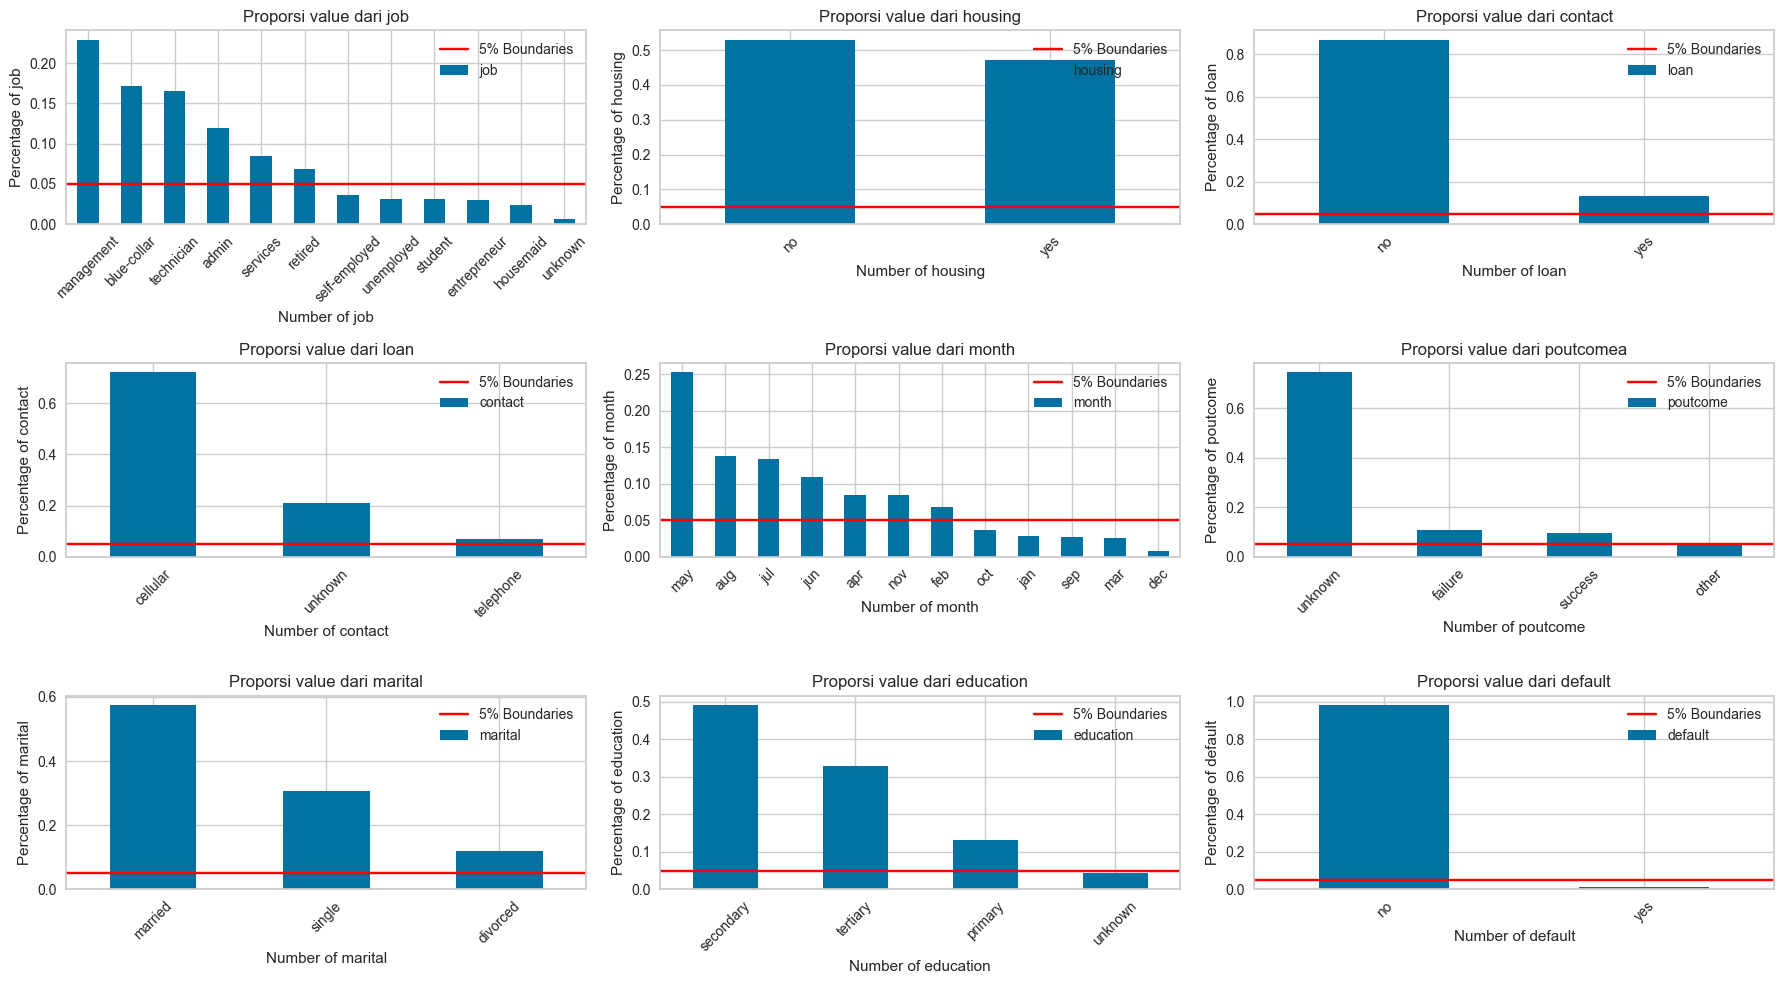

In [23]:
# kolom 'job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'marital', 'education', 'default'
cat_columns = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'marital', 'education', 'default']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))

# Title for each subplot
titles = ['Proporsi value dari job', 'Proporsi value dari housing', 
          'Proporsi value dari contact', 'Proporsi value dari loan', 
          'Proporsi value dari month', 'Proporsi value dari poutcomea',
          'Proporsi value dari marital', 'Proporsi value dari education',
          'Proporsi value dari default']

for i, ax in enumerate(axes.flat):
    # DataFrame
    temp_df = df[cat_columns[i]].value_counts() / len(df)
    temp_df = temp_df.sort_values(ascending=False)
    
    # Plot bar
    temp_df.plot(kind='bar', ax=ax)
    
    # Set title
    ax.set_title(titles[i])
    
    # Horizontal line: boundary yang digunakan adalah 5%, di bawah 5% akan diasumsikan sebagai rare value
    ax.axhline(y=0.05, color='red', label='5% Boundaries')
    
    # Set x label and its rotation
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel(f"Number of {cat_columns[i]}")
    
    # Y label
    ax.set_ylabel(f'Percentage of {cat_columns[i]}')
    
    # Legend
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show graph
plt.show()


__Insight :__<br>
* Terdapat 10 kolom variabel kategorikal dalam dataset ini, yaitu 2 kolom dengan tipe data ordinal (**month, education**) dan 8 kolom dengan tipe data nominal (**job, housing, loan, contact, poutcome, deposit, default, marital**).
* Kolom **job**, **contact**, dan **poutcome** memiliki value yang mendominasi, dan akan diperiksa apakah ada rare value yang perlu dihandle.
* Pekerjaan sebagai "`management`" memiliki ketertarikan yang tinggi untuk membuka rekening deposito, ditandai dengan dominasi value "`management`" pada kolom **job**.
* Bank paling efektif menghubungi nasabah melalui handphone, ditunjukkan oleh dominasi value "`cellular`" pada kolom **contact**.

In [24]:
Columns = []
Unknown = []
percentUnknown = []

for i in cat_columns:
    unknown = df[i].str.contains('unknown').sum()
    Unknown.append(unknown)

    percent_unknown = (unknown / len(df) * 100).round(2)
    percentUnknown.append(percent_unknown)

    Columns.append(i)

pd.DataFrame({
    'Columns' : Columns,
    'Number of unknown' : Unknown,
    '% unknown' : percentUnknown
}
)

,Columns,Number of unknown,% unknown
0,job,54,0.69
1,housing,0,0.00
2,loan,0,0.00
3,contact,1636,20.96
4,month,0,0.00
5,poutcome,5811,74.45
6,marital,0,0.00
7,education,351,4.50
8,default,0,0.00


__Insigth :__
*  Merubah fitur/kolom **month** menggunakan Ordinal Encoding, karena fitur ini memiliki urutan
* Penggabungan kategori `student`, `retired`, dan `unknown` dengan `unemployed` dilakukan berdasarkan asumsi bahwa baik siswa maupun orang yang telah pensiun tidak memiliki pekerjaan pada saat tertentu. Selain itu, kategori `unknown` juga diasumsikan tidak memiliki pekerjaan karena informasinya tidak diketahui.
* Penggabungan kategori `unknown` dengan `other` pada kolom **poutcome** karena informasinya tidak diketahui.
* Pada kategori `housmaid` akan digabungkan dengan `services`. Karena dapat dikatakan bahwa `housemaid` merupakan salah satu jenis pekerjaan `service`. ***[sumber](https://rstudio-pubs-static.s3.amazonaws.com/717459_5136236cf5064b8d973e4d8c1b863943.html)***
* Semua fitur/kolom akan dihandling menggunakan pycaret.

#### **Feature Engineering**

In [25]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

df_train.shape, df_test.shape

((6244, 19), (1561, 19))

In [26]:
display(df.education.unique(),
df.marital.unique(),
df.job.unique())

['secondary', 'tertiary', 'primary', 'unknown']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']

['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']

['admin', 'self-employed', 'services', 'housemaid', 'technician', ..., 'blue-collar', 'entrepreneur', 'retired', 'unemployed', 'unknown']
Length: 12
Categories (12, object): ['admin', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']

Deklarasi class untuk kategorisasi ulang variabel **job**, **month**, **poutcome**, **education**, **age**, **balance**:

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class clearAll(BaseEstimator, TransformerMixin):
    
    def _init_(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Replace value entrepreneur, student, retired, unknown, dan housemaid pada column job
        X['job'].replace({"student": "unemployed",
                          "retired": "unemployed",   
                          "unknown" : "unemployed",
                          "housemaid": "services"},
                          inplace= True)


        # Replace value month
        X['month'].replace({"jan": 1,
                            "feb": 2,
                            "mar": 3,
                            "apr": 4,
                            "may": 5,
                            "jun": 6,
                            "jul": 7,
                            "aug": 8,
                            "sep": 9,
                            "oct": 10,
                            "nov": 11,
                            "dec": 12},inplace= True)

        # Replace value unknown menjadi other pada column poutcome
        X['poutcome'].replace("unknown", "other", inplace= True)

        X['education'].replace("unknown", 'other', inplace=True)

        # Transformasi kolom 'age' dan 'balance' menggunakan pd.cut()
        age_bins = [-float('inf'), 25, 35, 60, float('inf')]
        age_labels = ['young', 'early-middle', 'late-middle', 'old']
        # X['age'] = pd.cut(X['age'], bins=age_bins, labels=age_labels)
        
        balance_bins = [-float('inf'), 0, 500, 1500, float('inf')]
        balance_labels = ['very-low', 'low', 'medium', 'high']
        X['balance'] = pd.cut(X['balance'], bins=balance_bins, labels=balance_labels)
        return X.to_numpy()

Integrasi PyCaret pipeline dengan custom pipeline:

In [28]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
import category_encoders as ce
from pycaret.internal.preprocess.transformers import TransformerWrapper, RemoveOutliers

# Membuat pipeline transformasi
pipeline = [
    ("clearAll", TransformerWrapper(include=['job', 'month', 'poutcome', 'pdays', 'balance', 'education'], transformer=clearAll())),
    ('scaleler', TransformerWrapper(include=['pdays', 'duration'], transformer=MinMaxScaler((0,1)))),
    ('onehot', TransformerWrapper(include=['poutcome', 'contact', 'marital','housing', 'loan', 'default'], transformer=OneHotEncoder())),
    ('binary', TransformerWrapper(include=['job'], transformer=ce.BinaryEncoder())),
    ('ordinal', TransformerWrapper(include=['month','balance', 'education'], transformer=OrdinalEncoder())),
    ("remove_outlier", TransformerWrapper(transformer=RemoveOutliers(method='iforest', random_state=42, threshold=0.05)))
    ]

Setting parameter dasar untuk menginisialisasi experiment dan membuat pipeline transformasi:

In [29]:
# Setting parameter dasar menggunakan pycaret
# import pycaret
from pycaret.classification import *

clf = setup(
    # general setup
    data=df_train, 
    target='deposit',
    train_size=0.8,
    verbose=True,
    preprocess=False,
    
    
    # feature setup
    numeric_features= ['age', 'balance', 'month', 'campaign', 'pdays', 'day', 'duration', 'previous'],
    categorical_features = ['job','contact', 'poutcome', 'education', 'marital','housing', 'loan', 'default'],
  
  
    # experiment setup
    session_id=42,
    log_experiment=True, 
    log_data=True,
    log_plots=True,

    # data wrangling
    # ignore_features=['default'],
    # remove_outliers=True,
    # outliers_method='lof',
    # outliers_threshold=0.1,
    custom_pipeline=pipeline,
    custom_pipeline_position=0,
)

,Description,Value
0,Session id,42
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(6244, 19)"
4,Transformed data shape,"(5994, 31)"
5,Transformed train set shape,"(4745, 31)"
6,Transformed test set shape,"(1249, 31)"
7,Numeric features,8
8,Categorical features,8


Proses encoding:

In [30]:
pd.set_option('display.max_columns', 500)

In [31]:
get_config('dataset_transformed')

,age,job_0,job_1,job_2,job_3,balance,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month,campaign,pdays,poutcome_failure,poutcome_other,poutcome_success,marital_divorced,marital_married,marital_single,education,default_no,default_yes,day,duration,previous,Anomaly,Anomaly_Score,deposit
4575,51,0,0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,2,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,16,0.086765,0,0,-0.053590,0
6638,23,0,0,1,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,2,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,13,0.155297,0,0,-0.079273,1
815,26,0,0,1,1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,8,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,16,0.042125,0,0,-0.091102,0
5638,30,0,1,0,0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,4.0,2,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,27,0.008488,0,0,-0.079696,0
4249,19,0,0,1,0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,2,0.240695,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,6,0.027350,1,1,0.026668,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,36,0,1,0,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,6.0,2,0.227047,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,12,0.081735,7,0,-0.053449,1
5292,31,0,0,1,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,4,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,12,0.220371,0,0,-0.071895,1
6302,61,0,0,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,10.0,1,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,25,0.106885,0,0,-0.029731,1
4981,25,0,1,0,0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,6.0,2,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,24,0.106885,0,0,-0.091644,0


In [32]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\NOR\AppData\Local\Temp\joblib),
         steps=[('clearAll',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['job',
                                                                            'month',
                                                                            'poutcome',
                                                                            'pdays',
                                                                            'balance',
                                                                            'education'],
                                                                   transformer=clearAll()))),
                ('scaleler',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=Transf...
                                                                   transformer=OrdinalEncoder(categories='auto',
                                                                                              dtype=<class 'numpy.float64'>,
                                                                                              encoded_missing_value=nan,
                                                                                              handle_unknown='error',
                                                                                              unknown_value=None)))),
                ('remove_outlier',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=None,
                                                                   transformer=RemoveOutliers(method='iforest',
                                                                                              n_jobs=1,
                                                                                              random_state=42,
                                                                                              threshold=0.05))))],
         verbose=False)

### `Modeling`

**Model Experiment**

In [33]:
from sklearn.metrics import balanced_accuracy_score

add_metric('bacc', 'Bal. Accuracy', balanced_accuracy_score, greater_is_better=True, target='pred')
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x000001FD2DFE8700>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x000001FD2DFE8...,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x000001FD2DFE8...,make_scorer(matthews_corrcoef),pred,{},True,True,False
bacc,Bal. Accuracy,Bal. Accuracy,<function balanced_accuracy_score at 0x000001F...,make_scorer(balanced_accuracy_score),pred,{},True,True,True


Next, mencari benchmark model menggunakan komparasi hasil validasi silang. Dengan benchmark model, akan lebih mudah memperkirakan apakah tujuan proyek ini dapat dicapai, berapa banyak waktu yang dibutuhkan untuk menyelesaikan proyek, dan kualitas dari pipeline transformasi.

Bandingkan model klasifikasi untuk mendapatkan benchmark model:

In [34]:
compare_models(include=['lr', 'gbc', 'ada', 'lightgbm', 'ridge', 'dt', 'rf', 'knn'], sort= 'F1' )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Bal. Accuracy,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8573,0.9206,0.8804,0.8325,0.8556,0.7147,0.7161,0.8581,5.4350
gbc,Gradient Boosting Classifier,0.8453,0.9144,0.8612,0.8248,0.8424,0.6906,0.6915,0.8459,5.8400
rf,Random Forest Classifier,0.8410,0.9087,0.8624,0.8171,0.8390,0.6823,0.6834,0.8419,7.1960
ada,Ada Boost Classifier,0.8202,0.8958,0.8016,0.8202,0.8106,0.6396,0.6399,0.8195,5.8880
lr,Logistic Regression,0.8036,0.8793,0.7657,0.8149,0.7893,0.6057,0.6071,0.8022,6.5410
ridge,Ridge Classifier,0.8002,0.0000,0.7432,0.8240,0.7812,0.5983,0.6013,0.7980,6.8110
dt,Decision Tree Classifier,0.7694,0.7684,0.7449,0.7684,0.7560,0.5375,0.5383,0.7684,7.7860
knn,K Neighbors Classifier,0.6765,0.7305,0.5928,0.6905,0.6374,0.3485,0.3522,0.6733,10.0250


Processing:   0%|          | 0/37 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

__Insigth :__
* Tabel di atas menunjukkan komparasi antara rerata skor matrik evaluasi terhadap 8 model klasifikasi berbeda.
* Dengan nilai rata-rata **`F1-Score`** > 0.5, model ini menunjukkan keseimbangan yang baik antara kemampuan model dalam memprediksi dengan akurat (`precision`) dan kemampuan model dalam mengidentifikasi kasus positif yang sebenarnya (`recall`), artinya menghasilkan prediksi yang seimbang antara `True Positive (TP)` dan `True Negative (TN)`, serta antara `False Positive (FP)` dan `False Negative (FN)`.
* Adapun dari pov balance accuracy, rerata skor berada **70-80%**, artinya jika dari 100 data yang di uji, sekitar 70-80 data yang terprediksi benar sebagai TN atau TP.
* Dengan mempertimbangkan nilai metric, training time (TT), dan kemampuan interpretasi, maka model yang diunggulkan pada dataset ini adalah *`Light Gradient Boosting Machine`*, *`Gradient Boosting Classifier`* dan *`Random Forest Classifier`*.
* Selanjutnya, 3 model tersebut akan di tunning dan dievaluasi ulang performanya untuk dipilih sebagai benchmark model.

Lakukan optimasi model benchmark:

__*Light Gradient Boosting Machine*__

In [35]:
lightgbm = create_model('lightgbm', cross_validation=True, return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Hasil dari crossvalidasi yang dilakukan pada nilai **`F1-Score`** menunjukkan pada percobaan data *train* adalah sebesar 0.9413 dan pada percobaan data *tes* adalah sebesar 0.8556

In [36]:
evallgbm = evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Mencoba optimalisasi model dengan mempertimbangkan probability threshold

In [37]:
lightgbm = create_model('lightgbm', cross_validation=True, return_train_score=True, probability_threshold = 0.3)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Setelah melakukan optimalisasi dengan mempertimbangkan probability threshold pada nilai **`F1-Score`** menunjukkan ada percobaan data *train* dari sebesar 0.9413 menjadi 0.9193 dan pada percobaan data *tes* 0.8556 menjadi 0.8634, masih dirasa cukup overfitting sehingga akan dilalukan tunning hyperparameter.

Percobaan optimalisai menggunakan tuning hyperparameter, dengan memperhatikan:

- `num_leaves`: Menentukan jumlah maksimum daun dalam setiap pohon dalam kelompok model.
- `max_depth`: Mengatur kedalaman maksimum setiap pohon dalam kelompok model.
- `learning_rate`: Menentukan seberapa besar kontribusi setiap model dalam setiap langkah.
- `n_estimators`: Mengatur jumlah pohon dalam kelompok model.
- `reg_alpha`: Mengontrol regulasi tipe L1 (Lasso) untuk mengurangi overfitting.
- `reg_lambda`: Mengontrol regulasi tipe L2 (Ridge) untuk mengendalikan kompleksitas model dan mencegah overfitting.

In [38]:
param_grid = {
    'num_leaves': [20, 30, 31],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [ 0.1, 1, 10, 100, 1000],
    'reg_lambda': [0.1, 1, 10, 100, 1000],
}

tuned_lgbm = tune_model(
    estimator=lightgbm, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:11:36
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


__Insight__:
* Setelah melakukan tunning hypermeter, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami penurunan dari 0.9193 menjadi 0.8957, sementara pada data *tes* juga mengalami penurunan dari 0.8634 menjadi 0.8604. 

__*Gradient Boosting Machine*__

In [39]:
gbc = create_model('gbc', cross_validation=True, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:31:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Hasil dari crossvalidasi yang dilakukan pada nilai **`F1-Score`** menunjukkan pada percobaan data *train* adalah sebesar 0.8663 dan pada percobaan data *tes* adalah sebesar 0.8424, hal ini dirasa masih overfitting maka dilakukan percobaan optimalisasi dengan mempertimbangkan probability threshold.

In [40]:
evalgbc = evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Mencoba optimalisasi model dengan mempertimbangkan probability threshold

In [42]:
gbc = create_model('gbc', cross_validation=True, return_train_score=True, probability_threshold = 0.25)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Setelah melakukan percobaan dengan mempertingkan probability threshold, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami penurunan dari 0.8663 menjadi 0.8458, sementara pada data *tes* juga mengalami kenaikan dari 0.8424 menjadi 0.8345. 

Percobaan optimalisai menggunakan tuning hyperparameter, dengan memperhatikan:

- `num_leaves`: Menentukan jumlah maksimum daun dalam setiap pohon dalam kelompok model.
- `max_depth`: Mengatur kedalaman maksimum setiap pohon dalam kelompok model.
- `learning_rate`: Menentukan seberapa besar kontribusi setiap model dalam setiap langkah.
- `n_estimators`: Mengatur jumlah pohon dalam kelompok model.
- `reg_alpha`: Mengontrol regulasi tipe L1 (Lasso) untuk mengurangi overfitting.
- `reg_lambda`: Mengontrol regulasi tipe L2 (Ridge) untuk mengendalikan kompleksitas model dan mencegah overfitting.

In [41]:
param_grid = {
    'max_depth': [ 1, 5],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'max_features' : [10, 15, 20, 25, 28]
}


tuned_gbc = tune_model(
    estimator=gbc, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:42:40
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


__Insight :__
* Setelah melakukan percobaan dengan tunning hypermerter, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami kenaikan dari 0.8458 menjadi 0.9171, sementara pada data *tes* juga mengalami kenaikan dari 0.8345 menjadi 0.8540

__*Random Forest*__

In [42]:
rf = create_model('rf', cross_validation=True, return_train_score=True)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:59:57
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Hasil dari crossvalidasi yang dilakukan pada nilai **`F1-Score`** menunjukkan pada percobaan data *train* adalah sebesar 0.9910 dan pada percobaan data *tes* adalah sebesar 0.8390, hal ini dirasa masih overfitting maka dilakukan percobaan optimalisasi dengan mempertimbangkan probability threshold.

In [44]:
evalrf = evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Mencoba optimasi model dengan setting probability threshold

In [45]:
rf = create_model('rf', cross_validation=True, return_train_score=True, probability_threshold = 0.4)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

__Insight :__
* Setelah melakukan percobaan dengan mempertimbangkan probability threshold, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami kenaikan dari 0.9910 menjadi 0.9987,  sementara pada data *tes* juga mengalami kenaikan dari 0.8390 menjadi 0.8446

Percobaan optimalisai menggunakan tuning hyperparameter, dengan memperhatikan:

- `num_leaves`: Menentukan jumlah maksimum daun dalam setiap pohon dalam kelompok model.
- `max_depth`: Mengatur kedalaman maksimum setiap pohon dalam kelompok model.
- `learning_rate`: Menentukan seberapa besar kontribusi setiap model dalam setiap langkah.
- `n_estimators`: Mengatur jumlah pohon dalam kelompok model.
- `reg_alpha`: Mengontrol regulasi tipe L1 (Lasso) untuk mengurangi overfitting.
- `reg_lambda`: Mengontrol regulasi tipe L2 (Ridge) untuk mengendalikan kompleksitas model dan mencegah overfitting.

In [47]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [50, 100, 150],
    'min_samples_leaf': [20, 40, 60, 80, 100],
    'max_features': [10, 15, 20, 25, 28]
}

tuned_rf = tune_model(
    estimator=rf, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


__Insight :__
* Setelah melakukan percobaan dengan tuning hypeparameter, terjadi perubahan pada nilai **`F1-Score`**. Pada data *train* mengalami penurunan dari 0.9987 menjadi 0.8597,  sementara pada data *tes* juga mengalami kenaikan dari 0.8446 menjadi 0.8419

Validasi silang 10-fold untuk mendapatkan rentang kinerja model:

In [53]:
cm = compare_models(include=[tuned_lgbm, tuned_gbc, tuned_rf])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:40:47
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Bal. Accuracy,TT (Sec)
0,Light Gradient Boosting Machine,0.8563,0.9206,0.9454,0.7948,0.8634,0.7141,0.7265,0.8596,13.7050
1,Gradient Boosting Classifier,0.8557,0.9194,0.8787,0.8310,0.8540,0.7115,0.7129,0.8565,7.1780
2,Random Forest Classifier,0.8380,0.9087,0.9250,0.7794,0.8459,0.6779,0.6891,0.8413,8.9540


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [70]:
finalizeModels = finalize_model(tuned_lgbm)

Setelah melakukan optimalisasi model dengan setting probability threshold dan tuning hyperparameter, didapatkan menemukan bahwa model `Light Gradient Boosting Machine` (lightgbm) memiliki nilai **`F1-Score`** yang lebih tinggi daripada model lainnya.

**Eksplanasi Model**

*Shapley Value of Explanations (SHAP)*<br>
Shapley Value adalah pendekatan berdasarkan teori permainan untuk menjelaskan hasil dari model pembelajaran mesin. Plot SHAP memberikan visualisasi yang lebih baik dalam tingkat nilai, sehingga kita dapat lebih percaya pada seberapa penting fitur kita bagi model.

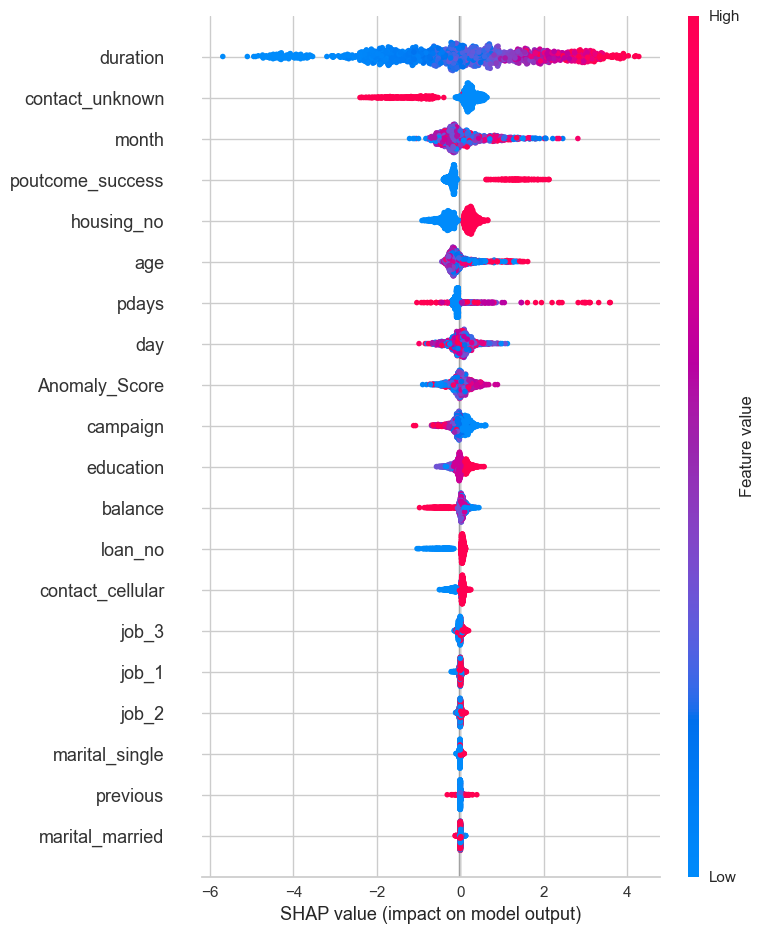

In [60]:
# interpret summary model
interpret_model(tuned_lgbm, plot = 'summary')

__Insight :__
1. Dalam fitur "duration" terlihat bahwa semakin lama bank berkomunikasi dengan nasabah, akan semakin berpengaruh terhadap kemungkinan nasabah membuka rekening deposito.
2. Pada fitur "contact" terlihat bahwa nasabah yang tidak dihubungi dengan status "unknown" cenderung memiliki dampak yang lebih besar terhadap prediksi bahwa mereka akan membuka rekening deposito.
3. Fitur berikutnya adalah "month", di mana nasabah yang ditelepon pada bulan-bulan akhir dan awal tahun cenderung memiliki pengaruh besar terhadap prediksi membuka rekening deposito. Namun, secara umum, mayoritas nasabah cenderung tidak membuka rekening deposito ketika kita memperhatikan fitur "month".
4. Dari fitur poutcome, dapat diartikan bahwa nasabah yang sebelumnya berhasil dijangkau oleh bank dalam kampanye juga memiliki kecenderungan lebih besar untuk diprediksi akan membuka rekening deposito.
5. Dalam fitur "housing", orang yang tidak memiliki hutang perumahan memiliki kemungkinan yang lebih tinggi untuk diprediksi akan membuka rekening deposito.

**Model Limitation**<br><br>
Model memiliki keterbatasan dalam memprediksi nasabah berdasarkan beberapa atribut tertentu. Beberapa atribut seperti **job, contact, marital, education** yang memiliki kategori-kategori terbatas yang dapat diidentifikasi oleh model. Kategori-kategori yang tidak ada dalam kolom tersebut akan dianggap sebagai "unknown". Namun, penambahan data dalam kategori ini dapat menghasilkan bias pada model karena data sebenarnya tidak ada pada saat pembuatan model. Semua keterbatasan ini perlu dipertimbangkan agar model dapat memberikan prediksi yang lebih akurat dan menghindari bias yang tidak diinginkan.

### `Conclusion`

In [74]:
# memunculkan nilai metrics
testPredict = predict_model(finalizeModels, data= df_test)
testPredict

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,...,education,default,day,duration,previous,Anomaly,Anomaly_Score,deposit,prediction_label,prediction_score
3055,36,services,115,no,no,unknown,jun,1,-1,unknown,...,secondary,no,6,201,0,0,-0.045538,0,0,0.9636
528,38,technician,1,yes,no,cellular,nov,5,199,success,...,secondary,no,21,57,1,0,-0.041439,0,0,0.9481
4764,77,retired,4112,no,no,telephone,jul,1,184,success,...,secondary,no,29,426,3,0,-0.009762,1,1,0.9809
2141,70,retired,44,no,no,cellular,sep,2,88,other,...,tertiary,no,18,1104,2,0,-0.002519,1,1,0.9166
4617,33,management,312,no,no,cellular,aug,1,369,failure,...,tertiary,no,11,271,3,0,-0.046892,0,1,0.7513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,59,services,1,yes,no,cellular,jan,1,253,other,...,secondary,no,28,602,5,1,0.033371,1,1,0.3984
3563,31,management,6138,no,no,cellular,oct,2,119,failure,...,tertiary,no,16,154,5,0,-0.034394,1,1,0.8909
678,34,admin,6979,yes,no,cellular,may,5,-1,unknown,...,secondary,no,15,14,0,0,-0.082447,0,0,0.9967
2545,49,management,2881,no,no,cellular,mar,3,-1,unknown,...,tertiary,no,2,120,0,0,-0.073740,1,1,0.6763


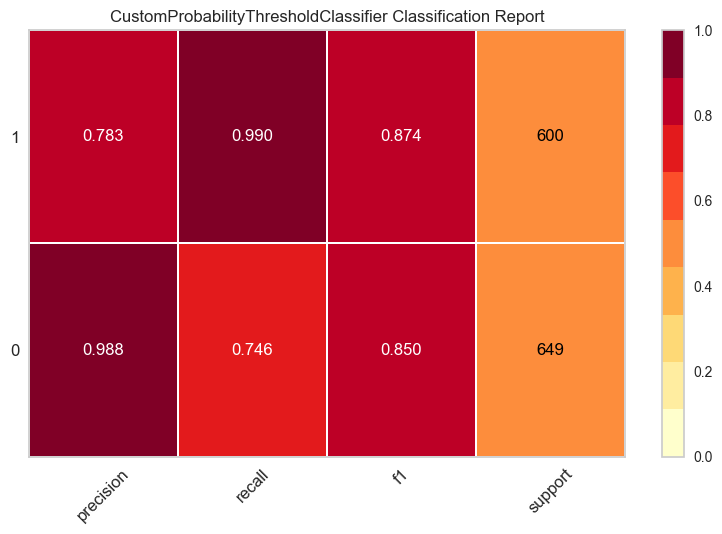

In [78]:
plot_model(finalizeModels, plot= 'class_report')

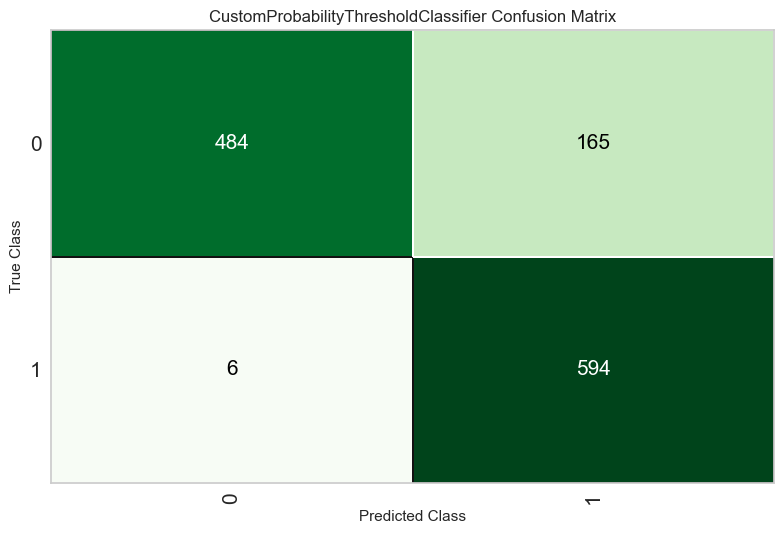

In [77]:
plot_model(finalizeModels, plot= 'confusion_matrix')

Berdasarkan hasil yang diperoleh dari model, dapat disimpulkan bahwa jika model ini digunakan untuk menyaring daftar kandidat nasabah, maka potensial mengurangi sebanyak 70,6% kandidat nasabah yang tidak cocok untuk didekati melalui kampanye. Model ini juga memiliki kemampuan memprediksi dengan akurasi sekitar 99% untuk mengidentifikasi kandidat nasabah yang berminat (berdasarkan recall).

Model ini memiliki tingkat keakuratan sekitar 78,3% dalam memprediksi kandidat nasabah potensial (berdasarkan precision). Namun, tetap ada kemungkinan bahwa sebagian kandidat yang diprediksi sebagai potensial sebenarnya tidak berminat.

Tanpa model, bank akan meluncurkan kampanye kepada 1561 kandidat nasabah, tanpa jaminan bahwa semuanya akan berpotensi. Dengan penggunaan model, bank dapat mengurangi target kampanye menjadi hanya 759 kandidat nasabah yang berpotensi, memberikan efisiensi baik dalam hal keuangan maupun waktu.

Secara keseluruhan, penggunaan model dapat memberikan solusi yang signifikan terhadap permasalahan bisnis bank.

### `Recommendations`

Hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

- Penawaran kampanye deposito bisa ditingkatkan pada tiga periode, yaitu kuartal 1 (Januari, Februari, Maret), kuartal 3 (Juli, Agustus, September), dan kuartal 4 (Oktober, November, Desember).
- Evaluasi kampanye bisa dijalankan secara berkala, karena analisis menunjukkan bahwa nasabah yang berhasil dijangkau dalam kampanye deposito sebelumnya cenderung berpotensi untuk berpartisipasi kembali dalam kampanye berikutnya.
- Kampanye deposito memiliki potensi yang baik pada nasabah yang tidak memiliki pinjaman rumah, karena analisis menunjukkan bahwa nasabah tanpa pinjaman rumah cenderung lebih tertarik untuk melakukan deposito.
- Menambahkan fitur baru berupa penghasilan bulanan nasabah dalam data dapat membantu mengidentifikasi karakteristik nasabah dengan lebih baik, yang pada akhirnya dapat memengaruhi prediksi apakah seorang nasabah akan melakukan deposito atau tidak.

**SAVE MODEL**

In [82]:
import pickle

pickle.dump(finalizeModels, open('Bank_marketing_campaign.sav', 'wb'))

In [83]:
# Load model 
filename = 'Bank_marketing_campaign.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [84]:
loaded_model

Pipeline(memory=FastMemory(location=C:\Users\NOR\AppData\Local\Temp\joblib),
         steps=[('clearAll',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['job',
                                                                            'month',
                                                                            'poutcome',
                                                                            'pdays',
                                                                            'balance',
                                                                            'education'],
                                                                   transformer=clearAll()))),
                ('scaleler',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=Transf...
                                                                                subsample_freq=0),
                                                      colsample_bytree=1.0,
                                                      importance_type='split',
                                                      learning_rate=0.1,
                                                      max_depth=-1,
                                                      min_child_samples=20,
                                                      min_child_weight=0.001,
                                                      min_split_gain=0.0,
                                                      n_estimators=100,
                                                      n_jobs=-1, num_leaves=31,
                                                      objective=None,
                                                      probability_threshold=0.3,
                                                      random_state=42,
                                                      reg_alpha=0.0,
                                                      reg_lambda=0.0,
                                                      subsample=1.0,
                                                      subsample_for_bin=200000,
                                                      subsample_freq=0))],
         verbose=False)